In [75]:
import pandas as pd

"""
Reading the bert output
"""

mapping = {1: "fear", 2: "anger", 3: "guilt", 4: "joy", 5: "shame", 6: "disgust", 0: "sadness"}

drop_col = [9, 10, 11, 12, 13, 14, 15]
bert_train = pd.read_csv("train-16.csv", header=None, on_bad_lines='skip', delimiter="|").drop(columns=drop_col)
bert_val = pd.read_csv("val-16.csv", header=None, on_bad_lines='skip', delimiter="|").drop(columns=drop_col)
bert_test = pd.read_csv("test-16.csv", header=None, on_bad_lines='skip', delimiter="|").drop(columns=drop_col)

bert_all = pd.concat([bert_train, bert_val, bert_test])
"""
Reading the train, val , test data
"""
"""
train = pd.read_csv("/Users/ItishaYadav1/CL-Team-Lab-Emotion-Classification/data/isear/isear-train.csv", on_bad_lines='skip', header=None)
print("Training data shape = ", train.shape)
val = pd.read_csv("/Users/ItishaYadav1/CL-Team-Lab-Emotion-Classification/data/isear/isear-val.csv", header=None)
print("Validation data shape = ", val.shape)
test = pd.read_csv("/Users/ItishaYadav1/CL-Team-Lab-Emotion-Classification/data/isear/isear-test.csv", header=None)
print("Test data shape = ", test.shape)
"""
import numpy as np
import hashlib

def get_prediction(df):
    pred = []
    match = []
    hash = []
    conf = []
    for ind, row in df.iterrows():
        m = 0
        hash_object = hashlib.sha256(row[0].encode('utf-8'))
        hex_dig = hash_object.hexdigest()
        hash.append(hex_dig)
        proba = list(row[[2, 3, 4, 5, 6, 7, 8]])
        largest = np.argmax(proba)
        if float(largest) == row[1]:
            m = 1
        match.append(m)
        pred.append(float(largest))
        proba.sort(reverse=True)
        conf.append([hex_dig, m] + proba)

    df["predictions"] = pred
    df["match"] = match
    df["_id"] = hash
    df = df.rename(columns={0: "sentence", 1: "ytrue"})

    return df, pd.DataFrame(conf)

bert_all, conf_df = get_prediction(bert_all)


In [76]:
bert_all

,sentence,ytrue,2,3,4,5,6,7,8,predictions,match,_id
0,When I understood that I was admitted to the U...,4.0,-4.143373,-4.099311,-4.180825,-3.873905,3.270709,-3.883025,-3.976190,4.0,1,57496f41a1283e64bcd582095e0121d32d9f297a9526e5...
1,I broke a window of a neighbouring house and I...,1.0,-4.454488,2.634034,-3.970481,-3.600777,-4.260800,-3.508614,-4.351669,1.0,1,9f5abc554b66183e2b9de975feb3b9f02975857c4b6663...
2,Got a big fish in fishing.,4.0,-3.871844,-4.237987,-4.067472,-3.916490,3.443163,-4.022819,-3.743179,4.0,1,bdce673da042f3c3297dde73b1c5bfade724f8e508d3fc...
3,"Whenever I am alone in a dark room, walk alone...",1.0,-4.045258,3.200204,-3.871938,-3.878467,-4.119332,-3.877209,-3.389095,1.0,1,490a81728c3228478e8f9196a09d485cd8e06b8c0512c4...
4,I bought a possible answer to a homework probl...,5.0,-4.648178,-4.786387,-1.271109,-2.308218,-4.468682,0.195158,-2.507853,5.0,1,7db158133f1a4d68c59dc693051bfe63c47c80d906dc01...
...,...,...,...,...,...,...,...,...,...,...,...,...
1140,Not being a good host for a friend from a far ...,3.0,-3.077817,-5.027366,-3.306948,1.170537,-5.571788,-1.354663,-2.787492,3.0,1,e9534a6e936543dcc8437a79899a804ffce79dac3054ee...
1141,"I had a very horrible dream one night, I dream...",1.0,-4.497149,2.975088,-3.899056,-3.790592,-4.291361,-3.033495,-3.544418,1.0,1,d1a9fe0005e2d8b96fe3a97c87621da377fd26d585efd4...
1142,"My sweetheart left me, or rather we decided to...",0.0,2.665590,-4.259548,-3.877426,-3.458135,-3.568334,-3.607715,-3.872411,0.0,1,9715d835adb73aac1dbf805e9e8474997a614da4222656...
1143,My boyfriend made me a proposal.,4.0,-4.251548,-4.527634,-3.848884,-4.058742,3.007751,-3.362574,-4.002860,4.0,1,9b088be713afaffe47f1b751f79cf0e584f93d8613819e...


In [83]:
conf_df.groupby(1).mean().iloc[0]

2    0.468895
3   -1.524600
4   -2.693809
5   -3.241329
6   -3.736658
7   -4.332664
8   -4.967506
Name: 0, dtype: float64

In [94]:
print(conf_df.groupby(1).mean())
conf_df[conf_df[1] == 0]

          2         3         4         5         6         7         8
1                                                                      
0  0.468895 -1.524600 -2.693809 -3.241329 -3.736658 -4.332664 -4.967506
1  2.139970 -2.654546 -3.304612 -3.592845 -3.829158 -4.109175 -4.398682


,0,1,2,3,4,5,6,7,8
7,e529d0e588faf319a8d2a56bce1cfbaa33e95bd9675f2a...,0,-0.008224,-0.964764,-1.882689,-2.903396,-3.956276,-5.073253,-5.711443
9,508013a422a1328897e746c1081fde9677a652d3726f03...,0,-0.728218,-1.289517,-1.292279,-1.551765,-1.902784,-2.547890,-3.734523
30,5101e942f4f13396228afcfc0ed7022a0bd6bae205467f...,0,2.535155,-3.758141,-3.882107,-4.036671,-4.077008,-4.282697,-4.305556
45,d7485e1149e3b505c3e36a20ea33e77c43703507178737...,0,0.248427,-1.630920,-1.910735,-4.273924,-4.447170,-4.692871,-5.099661
84,53c81747c3fca04f8f5b61fef58e98a2343ec64e8c48eb...,0,0.694850,-2.536959,-2.952217,-3.167273,-4.052315,-4.325487,-5.477589
...,...,...,...,...,...,...,...,...,...
7603,de310b231e98ef7333e9db336d15f4776bbc7657c75a7c...,0,-0.097690,-1.457908,-2.605385,-3.104316,-3.726416,-4.161256,-5.285932
7606,e1fe362705f21a14b6357fbb2efa698ff2a8d12b50630c...,0,0.082269,0.077403,-3.585347,-3.779755,-4.522589,-4.537704,-4.587114
7609,a83f80f12520ed9e13e989966c65741004f035375b6a11...,0,-0.001578,-1.585250,-2.177770,-3.840732,-4.270634,-4.719012,-5.603081
7611,626cb9b2d46c7417b520262f774105604125788a28f8bd...,0,0.357695,-0.800455,-2.666971,-3.686851,-4.200370,-4.346138,-5.021138


In [93]:
non_match = bert_all[bert_all["match"] == 0].reset_index(drop=True)
non_match = non_match.merge(conf_df[conf_df[1] == 0], left_on="_id", right_on=0)
non_match

,sentence,ytrue,2_x,3_x,4_x,5_x,6_x,7_x,8_x,predictions,...,_id,0,1,2_y,3_y,4_y,5_y,6_y,7_y,8_y
0,I went to a pub with a group of friends (not v...,3.0,-3.956276,-5.711443,-0.008224,-2.903396,-5.073253,-1.882689,-0.964764,2.0,...,e529d0e588faf319a8d2a56bce1cfbaa33e95bd9675f2a...,e529d0e588faf319a8d2a56bce1cfbaa33e95bd9675f2a...,0,-0.008224,-0.964764,-1.882689,-2.903396,-3.956276,-5.073253,-5.711443
1,[ No response.],0.0,-1.902784,-2.547890,-1.551765,-1.292279,-3.734523,-0.728218,-1.289517,5.0,...,508013a422a1328897e746c1081fde9677a652d3726f03...,508013a422a1328897e746c1081fde9677a652d3726f03...,0,-0.728218,-1.289517,-1.292279,-1.551765,-1.902784,-2.547890,-3.734523
2,[ No response.],0.0,-1.902784,-2.547890,-1.551765,-1.292279,-3.734523,-0.728218,-1.289517,5.0,...,508013a422a1328897e746c1081fde9677a652d3726f03...,508013a422a1328897e746c1081fde9677a652d3726f03...,0,-0.728218,-1.289517,-1.292279,-1.551765,-1.902784,-2.547890,-3.734523
3,[ No response.],0.0,-1.902784,-2.547890,-1.551765,-1.292279,-3.734523,-0.728218,-1.289517,5.0,...,508013a422a1328897e746c1081fde9677a652d3726f03...,508013a422a1328897e746c1081fde9677a652d3726f03...,0,-0.728218,-1.289517,-1.292279,-1.551765,-1.902784,-2.547890,-3.734523
4,[ No response.],0.0,-1.902784,-2.547890,-1.551765,-1.292279,-3.734523,-0.728218,-1.289517,5.0,...,508013a422a1328897e746c1081fde9677a652d3726f03...,508013a422a1328897e746c1081fde9677a652d3726f03...,0,-0.728218,-1.289517,-1.292279,-1.551765,-1.902784,-2.547890,-3.734523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4562,Our Headmaster came to our hostel. The lights ...,3.0,-5.285932,-1.457908,-2.605385,-3.104316,-4.161256,-0.097690,-3.726416,5.0,...,de310b231e98ef7333e9db336d15f4776bbc7657c75a7c...,de310b231e98ef7333e9db336d15f4776bbc7657c75a7c...,0,-0.097690,-1.457908,-2.605385,-3.104316,-3.726416,-4.161256,-5.285932
4563,Every time I was around this one person I woul...,5.0,-4.587114,-4.522589,-3.779755,0.082269,-4.537704,0.077403,-3.585347,3.0,...,e1fe362705f21a14b6357fbb2efa698ff2a8d12b50630c...,e1fe362705f21a14b6357fbb2efa698ff2a8d12b50630c...,0,0.082269,0.077403,-3.585347,-3.779755,-4.522589,-4.537704,-4.587114
4564,When I quarrelled with a very close friend of ...,0.0,-4.270634,-4.719012,-1.585250,-0.001578,-5.603081,-2.177770,-3.840732,3.0,...,a83f80f12520ed9e13e989966c65741004f035375b6a11...,a83f80f12520ed9e13e989966c65741004f035375b6a11...,0,-0.001578,-1.585250,-2.177770,-3.840732,-4.270634,-4.719012,-5.603081
4565,Adultery with a friend's girlfriend.,3.0,-4.200370,-4.346138,-3.686851,-0.800455,-5.021138,0.357695,-2.666971,5.0,...,626cb9b2d46c7417b520262f774105604125788a28f8bd...,626cb9b2d46c7417b520262f774105604125788a28f8bd...,0,0.357695,-0.800455,-2.666971,-3.686851,-4.200370,-4.346138,-5.021138


/Users/ItishaYadav1/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

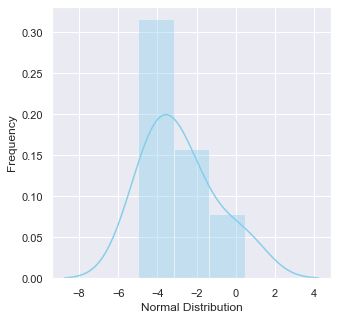

In [88]:
# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image

# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

ax = sns.distplot(conf_df.groupby(1).mean().iloc[0],
                  kde=True,
                  color='skyblue'
                  )
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

In [23]:
"""
Applying analysis on test
"""

# inp_data = pd.concat([test, val])
# bert_out = pd.concat([bert_test, bert_val])


inp_data = test
bert_out = bert_test

assert inp_data.shape[0] == bert_out.shape[0]

analysis_df = inp_data.merge(bert_out, left_index=True, right_index=True)
analysis_df = analysis_df[analysis_df["anger"]]



'\ninp_data = test\nbert_out = bert_test\n\nassert inp_data.shape[0] == bert_out.shape[0]\n\nanalysis_df = inp_data.merge(bert_out, left_index=True, right_index=True)\nanalysis_df = analysis_df[analysis_df["anger"]]\n\n'

In [24]:
bert_all

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-4.143373,-4.099311,-4.180825,-3.873905,3.270709,-3.883025,-3.976190,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-4.454488,2.634034,-3.970481,-3.600777,-4.260800,-3.508614,-4.351669,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-3.871844,-4.237987,-4.067472,-3.916490,3.443163,-4.022819,-3.743179,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-4.045258,3.200204,-3.871938,-3.878467,-4.119332,-3.877209,-3.389095,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-4.648178,-4.786387,-1.271109,-2.308218,-4.468682,0.195158,-2.507853,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7614,-3.077817,-5.027366,-3.306948,1.170537,-5.571788,-1.354663,-2.787492,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7615,-4.497149,2.975088,-3.899056,-3.790592,-4.291361,-3.033495,-3.544418,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7616,2.665590,-4.259548,-3.877426,-3.458135,-3.568334,-3.607715,-3.872411,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7617,-4.251548,-4.527634,-3.848884,-4.058742,3.007751,-3.362574,-4.002860,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [97]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split

def mlp_classifier(X, y):

    """Perform PCA"""


    oversample = SMOTE()

    X, y = oversample.fit_resample(X, y)
    print(y.value_counts())
    pca = PCA(n_components=3)
    reduced_data = pca.fit_transform(X)
    reduced_data_df = pd.DataFrame(reduced_data, columns=["dim1", "dim2", "dim3"])
    print(pca.explained_variance_ratio_)
    data_col = reduced_data_df.columns
    scalar = StandardScaler()

    scalar.fit(reduced_data_df)
    # transform data
    standard_data = scalar.transform(reduced_data_df)
    standard_df = pd.DataFrame(standard_data, columns=data_col)
    print(standard_df.shape)
    print(len(y))
    """
    Data Splitting
    """
    X_train, X_test, y_train, y_test = train_test_split(standard_df, y, test_size = 0.2,
                                                        random_state = 42, stratify = y)

    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

    """Model training"""

    from sklearn.neural_network import MLPClassifier
    clf = MLPClassifier(max_iter=100, random_state=42, activation="tanh", solver="adam", hidden_layer_sizes=(100, ),
    learning_rate="adaptive")
    clf.fit(X_train, y_train)


    """Predictions"""

    y_pred_train = clf.predict(standard_df)
    y_pred_train_proba = clf.predict_proba(standard_df)
    # evaluate predictions
    accuracy = accuracy_score(y, y_pred_train)
    print("Train Accuracy: %.2f%%" % (accuracy * 100.0))
    print(classification_report(y, y_pred_train))

    print(confusion_matrix(y, y_pred_train))
    print()
    print()

    # make predictions for test data
    y_pred = clf.predict(X_test)
    y_pred_prob = clf.predict_proba(X_test)

    top_df_test = X_test
    top_df_test["yhat"] = y_pred
    top_df_test[["y_pred_prob_1", "y_pred_prob_2"]] = y_pred_prob
    top_df_test["ytrue"] = y_test
    top_match = []
    for ind, row in top_df_test.iterrows():
        if row["ytrue"] == row["yhat"]:
            top_match.append(1)
        else:
            top_match.append(0)
    top_df_test["match"] = top_match
    # evaluate predictions
    accuracy = accuracy_score(y_test, y_pred)
    print("Test Accuracy: %.2f%%" % (accuracy * 100.0))
    print(classification_report(y_test, y_pred))

    print(confusion_matrix(y_test, y_pred))
    return top_df_test, pca, scalar, clf

"""
define y
"""
# transform the dataset
import pickle
a, pca, scalar, clf = mlp_classifier(conf_df.drop(columns=[0, 1]).reset_index(drop=True), conf_df[1])
a

1    6172
0    6172
Name: 1, dtype: int64
[0.6970196  0.14109169 0.08099354]
(12344, 3)
12344
(9875, 3) (9875,) (2469, 3) (2469,)
Train Accuracy: 78.76%
              precision    recall  f1-score   support

           0       0.76      0.83      0.80      6172
           1       0.82      0.74      0.78      6172

    accuracy                           0.79     12344
   macro avg       0.79      0.79      0.79     12344
weighted avg       0.79      0.79      0.79     12344

[[5139 1033]
 [1589 4583]]


Test Accuracy: 78.78%
              precision    recall  f1-score   support

           0       0.76      0.83      0.80      1235
           1       0.82      0.74      0.78      1234

    accuracy                           0.79      2469
   macro avg       0.79      0.79      0.79      2469
weighted avg       0.79      0.79      0.79      2469

[[1028  207]
 [ 317  917]]


,dim1,dim2,dim3,yhat,y_pred_prob_1,y_pred_prob_2,ytrue,match
11932,1.594322,-0.023795,-1.156041,0,0.888671,0.111329,0,1
1896,0.069710,-0.345975,0.621636,0,0.528909,0.471091,0,1
11676,-1.076294,-0.500565,-0.644399,1,0.246130,0.753870,0,0
5695,-1.581426,-0.054975,-0.518705,1,0.077281,0.922719,1,1
12094,0.078587,-1.407673,1.721454,0,0.608567,0.391433,0,1
...,...,...,...,...,...,...,...,...
5305,-0.283464,0.122823,0.643270,1,0.312340,0.687660,1,1
11294,1.387510,3.876121,2.509586,0,0.890139,0.109861,0,1
9294,1.217284,0.078961,-1.337352,0,0.854516,0.145484,0,1
12330,0.338228,-1.035749,0.097836,0,0.682393,0.317607,0,1


In [ ]:

"""
Strategy to approach the research question:
    1. Filter the dataset (all) to find misclassified examples.
    2. Find out the those specific sentences and see manually, if they are the potential examples of class overlapping.
    3. Train the ORD detector, and see of the correct label for missclassfied classes are in the top 3 recommendation or not?
    4. Evaluate the bert model, using our custom evaluator
"""


"""

As discussed with Prof, go with approach one and put approach 2 in future work
ORD:

1. BERT
2. Low_vs_high confidence detector

Soft decision maker:

1. Approach 1: Rule Based

    If overlapping region detected:

    Recommend top 2 emotions

    If non overlapping region detected:

    Recommend top emotion

2. Approach 2: Machine learning based
    1. Train Classifiers:
        1. Classifier 1 checks if top 2 can be recommended.
        2. Classifier 2 checks, if top 3 can be recommended.
        3. Worst case senario: model not confident with the emotion.
"""

In [99]:
a.groupby(["match", "ytrue"]).count()["dim1"]

match  ytrue
0      0         207
       1         317
1      0        1028
       1         917
Name: dim1, dtype: int64